### Ocena modeli regresyjnych

Model regresyjny ma za zadanie przewidywać ciągłą zmienną numeryczną, np.
- ceny nieruchomości
- liczba pasażerów linii lotniczych
- temperatura

Aby dowiedzieć się jak dobry jest model regresyjny sprawdzamy jak dobre są predykcje modelu w porównaniu do danych, które wcześniej nie były wykorzystywane do budowy modelu (dane testowe). W tym celu przed rozpoczęciem budowy modelu musimy podzielić nasze dane na zbiór treningowy (zbiór na którym nasz model będzie się uczył) oraz zbiór testowy (zbiór na którym będziemy oceniać dokładność naszego modelu). W zależności od ilości dostępnych danych zwykle dzieli się takie zbiory na przykład na: 
- 70% train_set, 30% test_set
- 80% train_set, 20% test_set

Popularne techniki do oceny modeli regresyjnych:
- obserwacja przy użyciu wykresu
- rozkład reszt
- ocena przy pomocy takich metryk jak średni błąd kwadratowy (MSE - mean square error), pierwiastek ze średniego błędu kwadratowego (RMSE - root mean square error)

$$MSE = \sum_{i=1}^{n}{(y\_true_{i} - y\_{pred}_{i})^{2}}$$
$$RMSE = \sqrt{\sum_{i=1}^{n}{(y\_true_{i} - y\_{pred}_{i})^{2}}}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import load_boston

df_raw = load_boston()
df_raw

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df = df_raw.data
target = df_raw.target

df = np.c_[df, target]
df = pd.DataFrame(data=df, columns=list(df_raw.feature_names) + ['price'])

In [4]:
df.shape

(506, 14)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

#### Podział na zbiór treningowy i testowy

In [18]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X, y)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (379, 13)
X_test shape: (127, 13)


#### Regresja liniowa

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
lin_reg.score(X_test, y_test)

0.7041997009734355

In [21]:
y_pred = lin_reg.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['linear_model'])

In [24]:
y_test.reset_index(drop=True, inplace=True)

In [27]:
predictions = pd.concat([y_test, y_pred], axis=1)
predictions['residual'] = predictions['price'] - predictions['linear_model']

In [29]:
predictions.head()

,price,linear_model,residual
0,23.7,10.709898,12.990102
1,43.5,39.501573,3.998427
2,7.5,12.690047,-5.190047
3,17.3,16.287979,1.012021
4,30.5,30.912825,-0.412825


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


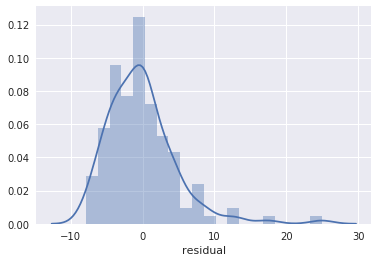

In [33]:
sns.distplot(predictions['residual'], bins=20)